In [1]:
import pymysql.cursors
import pandas as pd
connection = pymysql.connect(host='127.0.0.1',port=3306,\
                         user='root',password='root',db='test',charset='utf8mb4',cursorclass=pymysql.cursors.DictCursor)

In [2]:
candidates = pd.read_csv("C:\\Users\\yukino\\Desktop\\weball20.txt", sep = '|',names=['CAND_ID','CAND_NAME','CAND_ICI','PTY_CD','CAND_PTY_AFFILIATION','TTL_RECEIPTS',
                                                          'TRANS_FROM_AUTH','TTL_DISB','TRANS_TO_AUTH','COH_BOP','COH_COP','CAND_CONTRIB',
                                                          'CAND_LOANS','OTHER_LOANS','CAND_LOAN_REPAY','OTHER_LOAN_REPAY','DEBTS_OWED_BY',
                                                          'TTL_INDIV_CONTRIB','CAND_OFFICE_ST','CAND_OFFICE_DISTRICT','SPEC_ELECTION','PRIM_ELECTION','RUN_ELECTION'
                                                          ,'GEN_ELECTION','GEN_ELECTION_PRECENT','OTHER_POL_CMTE_CONTRIB','POL_PTY_CONTRIB',
                                                          'CVG_END_DT','INDIV_REFUNDS','CMTE_REFUNDS'])
#读取候选人和委员会的联系信息
ccl = pd.read_csv("C:\\Users\\yukino\\Desktop\\ccl.txt", sep = '|',names=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP','CMTE_DSGN','LINKAGE_ID'])
itcont = pd.read_csv('C:\\Users\\yukino\\Desktop\\itcont_2020_20200722_20200820.txt', sep='|',names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI','IMAGE_NUM','TRANSACTION_TP','ENTITY_TP','NAME','CITY',
                                                                              'STATE','ZIP_CODE','EMPLOYER','OCCUPATION','TRANSACTION_DT',
                                                                                  'TRANSACTION_AMT','OTHER_ID','TRAN_ID','FILE_NUM','MEMO_CD','MEMO_TEXT','SUB_ID'])

FileNotFoundError: [Errno 2] File C:\Users\yukino\Desktop\weball20.txt does not exist: 'C:\\Users\\yukino\\Desktop\\weball20.txt'

In [3]:
ccl = ccl[['CMTE_ID','CAND_ID']] 
candidates = candidates[['CAND_ID','CAND_NAME','CAND_PTY_AFFILIATION']]
itcont = itcont[['CMTE_ID','NAME','STATE','EMPLOYER','OCCUPATION','TRANSACTION_AMT','TRANSACTION_DT']]

In [4]:
ccl=pd.merge(ccl,candidates)
c_itcont = pd.merge(ccl,itcont)

In [5]:
c_itcont = c_itcont.drop(["CMTE_ID","CAND_ID"],axis='columns')

In [6]:
c_itcont.head(10)

,CAND_NAME,CAND_PTY_AFFILIATION,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT
0,"MORGAN, JOSEPH DAVID",REP,"MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,7242020
1,"MORGAN, JOSEPH DAVID",REP,"RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7242020
2,"MORGAN, JOSEPH DAVID",REP,"RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7312020
3,"WOOD, DANIEL",REP,"HOPKINS, RICHARD",AZ,POWERS-LEAVITT,INSURANCE AGENT,300,8102020
4,"WOOD, DANIEL",REP,"PENDLETON, DIANE",AZ,UNEMPLOYED,NaN,500,8072020
5,"WOOD, DANIEL",REP,"PREVATT, WILLIAM",AZ,SELF-EMPLOYED,DVM,500,7312020
6,"WOOD, DANIEL",REP,"HARDING, DOUG",AZ,MICROSURE,OPERATIONS MANAGER,2800,8102020
7,"WOOD, DANIEL",REP,"HARDING, MARI",AZ,NaN,NaN,1400,8152020
8,"WOOD, DANIEL",REP,"HEDGER, CYNTHIA",TX,NaN,NaN,200,7312020
9,"HUANG, PEGGY",REP,"HUANG - PERSONAL FUNDS, PEGGY",CA,OFFICE OF THE ATTORNEY GENERAL,DEPUTY ATTORNEY GENERAL,2600,7252020


In [13]:
c_itcont.shape
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   CAND_PTY_AFFILIATION  756205 non-null  object
 2   NAME                  756205 non-null  object
 3   STATE                 756205 non-null  object
 4   EMPLOYER              756205 non-null  object
 5   OCCUPATION            756205 non-null  object
 6   TRANSACTION_AMT       756205 non-null  int64 
 7   TRANSACTION_DT        756205 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 51.9+ MB


In [11]:
c_itcont['STATE'].fillna('NOT PROVIDED',inplace=True)
c_itcont['EMPLOYER'].fillna('NOT PROVIDED',inplace=True)
c_itcont['OCCUPATION'].fillna('NOT PROVIDED',inplace=True)

In [14]:
c_itcont['TRANSACTION_DT'] = c_itcont['TRANSACTION_DT'] .astype(str)
# 将日期格式改为年月日  7242020	
c_itcont['TRANSACTION_DT'] = [i[3:7]+i[0:3] for i in c_itcont['TRANSACTION_DT'] ]

In [16]:
c.shape
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   CAND_PTY_AFFILIATION  756205 non-null  object
 2   NAME                  756205 non-null  object
 3   STATE                 756205 non-null  object
 4   EMPLOYER              756205 non-null  object
 5   OCCUPATION            756205 non-null  object
 6   TRANSACTION_AMT       756205 non-null  int64 
 7   TRANSACTION_DT        756205 non-null  object
dtypes: int64(1), object(7)
memory usage: 51.9+ MB


In [17]:
c_itcont.head(3)

,CAND_NAME,CAND_PTY_AFFILIATION,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT
0,"MORGAN, JOSEPH DAVID",REP,"MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,2020724
1,"MORGAN, JOSEPH DAVID",REP,"RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020724
2,"MORGAN, JOSEPH DAVID",REP,"RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020731


In [19]:
c_itcont.describe()

,TRANSACTION_AMT
count,7.562050e+05
mean,1.504307e+02
std,2.320452e+03
min,-5.600000e+03
25%,2.000000e+01
50%,3.500000e+01
75%,1.000000e+02
max,1.500000e+06


In [24]:
c_itcont_table=[]
for i in c_itcont.values:
    c_itcont_table.append(list(i))#将数据处理成列表嵌套列表的形式才能提交给mysql
cursor = connection.cursor()
sql = "create table c_itcont(CAND_NAME VARCHAR(50),CAND_PTY_AFFILIATION CHAR(5),NAME VARCHAR(50),STATE CHAR(20),EMPLOYER VARCHAR(50),OCCUPATION VARCHAR(50),TRANSACTION_AMT INT,TRANSACTION_DT VARCHAR(50))"
connection.ping(reconnect=True)#没有这一行可能会出错
cursor.execute(sql)
sql2 = "insert into c_itcont values(%s,%s,%s,%s,%s,%s,%s,%s)"
cursor.executemany(sql2,c_itcont_table)
connection.commit()#将数据提交到mysql
cursor.close()
connection.close()


In [23]:
sql = "select CAND_PTY_AFFILIATION,sum(TRANSACTION_AMT) as total_AMT from c_itcont group by CAND_PTY_AFFILIATION \
order by sum(TRANSACTION_AMT) desc limit 10 "


In [3]:
a=pd.read_csv(r'C:\Users\yukino\Desktop\query1.csv')

In [13]:
dataset=[0]
path=r'C:\Users\yukino\Desktop\query'
for i in range(1,7):
    dataset.append(pd.read_csv(path+str(i)+'.csv'))

In [14]:
import matplotlib.pyplot as plt

In [19]:
dataset[5]

,STATE,total_AMT
0,CA,19999115
1,NY,11468537
2,FL,8128789
3,TX,8101871
4,MA,5187957


In [18]:
dataset[5]['STATE']

0    CA
1    NY
2    FL
3    TX
4    MA
Name: STATE, dtype: object

Text(0.5, 1.0, 'total contributions per state ')

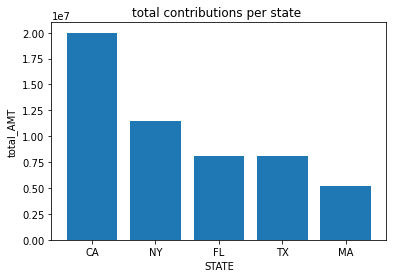

In [36]:
plt.bar(dataset[5]['STATE'],dataset[5]['total_AMT'])
plt.xlabel('STATE')
plt.ylabel('total_AMT')
plt.title("total contributions per state ")

Text(0.5, 1.0, 'the total number of donations per state ')

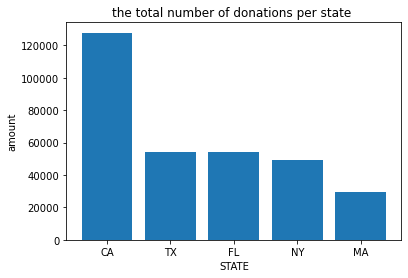

In [38]:
plt.bar(dataset[6]['STATE'],dataset[6]['number'])
plt.xlabel('STATE')
plt.ylabel('amount')
plt.title("the total number of donations per state")

In [42]:
dataset[2]

,CAND_NAME,total_AMT
0,"BIDEN, JOSEPH R JR",68111142
1,"TRUMP, DONALD J.",16594982
2,"SULLIVAN, DAN",9912465
3,"JACOBS, CHRISTOPHER L.",6939209
4,"BLOOMBERG, MICHAEL R.",3451916
5,"MARKEY, EDWARD J. SEN.",606832
6,"SHAHEEN, JEANNE",505446
7,"KENNEDY, JOSEPH P III",467738
8,"CORNYN, JOHN SEN",345959
9,"FIGLESTHALER, WILLIAM MATTHEW MD",258221


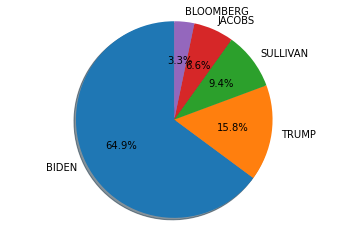

In [56]:
labels = dataset[2]["CAND_NAME"].str.split(',').str.get(0)[:5]
sizes = dataset[2]["total_AMT"][:5]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig(r'C:\Users\yukino\Desktop\graph3.png')
plt.show()